In [1]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)
library(cluster)
library(factoextra)
library(NbClust)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Load data

In [3]:
spe <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_spe.txt', row.names = 1)
env <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_env.txt', row.names = 1)
traits <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_traits.txt', row.names = 1)
loc <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_loc.txt')
 

In [4]:
head(spe)

,Acer.palmatum.var..pubescens,Acer.serrulatum,Ardisia.quinquegona,Barthea.barthei,Blastus.cochinchinensis,Camellia.brevistyla,Camellia.tenuifolia,Castanopsis.cuspidata.var..carlesii,Chamaecyparis.obtusa.var..formosana,Cinnamomum.kanehirae,⋯,Symplocos.wikstroemiifolia,Syzygium.buxifolium,Ternstroemia.gymnanthera,Tricalysia.dubia,Trochodendron.aralioides,Turpinia.formosana,Vaccinium.randaiense,Viburnum.foetidum.var..rectangulatum,Viburnum.integrifolium,Viburnum.taitoense
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0,0.00,4.94,0.00,9.49,0.00,0,4.16,0.00,0.00,⋯,0,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00
M02,0,4.45,0.48,0.00,0.49,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00
M03,0,0.00,0.18,0.00,21.31,0.00,0,0.92,0.00,5.06,⋯,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Q01,0,0.00,0.00,0.16,0.00,0.00,0,0.00,0.17,0.00,⋯,0,12.37,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00
Q02,0,0.00,0.00,0.00,0.00,0.41,0,0.00,0.00,0.00,⋯,0,0.00,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36
Q03,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63


In [6]:
spe2 <- t(spe)

In [11]:
head(spe2)

,M01,M02,M03,Q01,Q02,Q03,U01,U02,U03
Acer.palmatum.var..pubescens,0.00,0.00,0.00,0.00,0.00,0,3.31,0,0.00
Acer.serrulatum,0.00,4.45,0.00,0.00,0.00,0,0.00,0,0.00
Ardisia.quinquegona,4.94,0.48,0.18,0.00,0.00,0,0.00,0,0.00
Barthea.barthei,0.00,0.00,0.00,0.16,0.00,0,0.00,0,6.83
Blastus.cochinchinensis,9.49,0.49,21.31,0.00,0.00,0,0.00,0,0.00
Camellia.brevistyla,0.00,0.00,0.00,0.00,0.41,0,0.00,0,0.00


In [2]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- loc <- read_delim("MQU_loc.txt", delim = "\t")

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (5): SLA, LDMC, LT, LA, SSD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types =

In [3]:
# modify name of location by site
spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)

In [5]:
spe
env
loc
traits

site,Acer palmatum var. pubescens,Acer serrulatum,Ardisia quinquegona,Barthea barthei,Blastus cochinchinensis,Camellia brevistyla,Camellia tenuifolia,Castanopsis cuspidata var. carlesii,Chamaecyparis obtusa var. formosana,⋯,Symplocos wikstroemiifolia,Syzygium buxifolium,Ternstroemia gymnanthera,Tricalysia dubia,Trochodendron aralioides,Turpinia formosana,Vaccinium randaiense,Viburnum foetidum var. rectangulatum,Viburnum integrifolium,Viburnum taitoense
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0.00,0.00,4.94,0.00,9.49,0.00,0.00,4.16,0.00,⋯,0.00,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00
M02,0.00,4.45,0.48,0.00,0.49,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00
M03,0.00,0.00,0.18,0.00,21.31,0.00,0.00,0.92,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Q01,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.17,⋯,0.00,12.37,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00
Q02,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,⋯,0.00,0.00,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36
Q03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63
U01,3.31,0.00,0.00,0.00,0.00,0.00,3.25,12.43,0.00,⋯,1.04,0.00,1.59,0.00,4.01,0.00,0.0,1.30,0.00,0.00
U02,0.00,0.00,0.00,0.00,0.00,0.00,2.32,0.00,2.21,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
U03,0.00,0.00,0.00,6.83,0.00,0.00,0.00,0.00,45.63,⋯,0.00,0.00,0.36,0.00,2.28,0.00,0.0,1.18,0.00,0.00


site,Elevation,pH
<chr>,<dbl>,<dbl>
M01,794,3.8
M02,947,4.1
M03,868,3.0
Q01,1343,3.5
Q02,1606,3.0
Q03,1571,3.4
U01,1890,2.9
U02,2082,2.8
U03,1921,3.2


site,Locality name,Date of vegetation sampling,Latitude,Longitude
<chr>,<chr>,<chr>,<dbl>,<dbl>
M01,Luen-Pi-Chi,9/13/2014,24.70344,121.5912
M02,Nan-Cha-Tien Shan,11/4/2014,24.77967,121.4116
M03,Wu-Lai_Fu-Shan,11/19/2014,24.78294,121.4828
Q01,Fu-Sin-Jien I,9/16/2014,24.64919,121.4356
Q02,Fu-Sin-Jien II,9/28/2014,24.65611,121.4338
Q03,Fu-Fu-Shan,10/14/2014,24.72600,121.3916
U01,Di-Lu-Shan,10/3/2014,24.64364,121.3746
U02,Ta-Man-Shan,10/15/2014,24.70092,121.4444
U03,Yuan-Yang-Lake,10/21/2014,24.56953,121.4049


Species,SLA,LDMC,LT,LA,SSD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Acer palmatum var. pubescens,22.0,427.3,0.14,1785,0.61
Acer serrulatum,19.1,446.6,0.15,2534,0.61
Ardisia quinquegona,11.3,423.1,0.21,1428,0.60
Barthea barthei,20.8,301.6,0.28,1504,0.54
Blastus cochinchinensis,31.7,267.8,0.19,3628,0.50
Camellia brevistyla,10.3,409.4,0.32,796,0.57
Camellia tenuifolia,9.9,420.7,0.34,854,0.56
Castanopsis cuspidata var. carlesii,9.8,473.6,0.32,1816,0.55
Chamaecyparis obtusa var. formosana,7.2,461.6,0.71,756,0.47


## Clustering

### Distance matrix

          M01       M02       M03       Q01       Q02       Q03       U01
M02 1.2217848                                                            
M03 0.8375617 1.2690128                                                  
Q01 1.2536300 1.3944600 1.3654448                                        
Q02 1.2781406 1.3339139 1.3404112 1.1269296                              
Q03 1.3028390 1.2945328 1.3060528 1.3238517 1.0427409                    
U01 1.3650200 1.3998677 1.3931773 1.3934027 1.1458584 0.8737859          
U02 1.4142136 1.4137391 1.4142136 1.3780734 1.3678148 1.4026732 1.1279569
U03 1.4142136 1.4140476 1.4141070 1.4081217 1.3893560 1.4098913 1.3505826
          U02
M02          
M03          
Q01          
Q02          
Q03          
U01          
U02          
U03 1.3369047

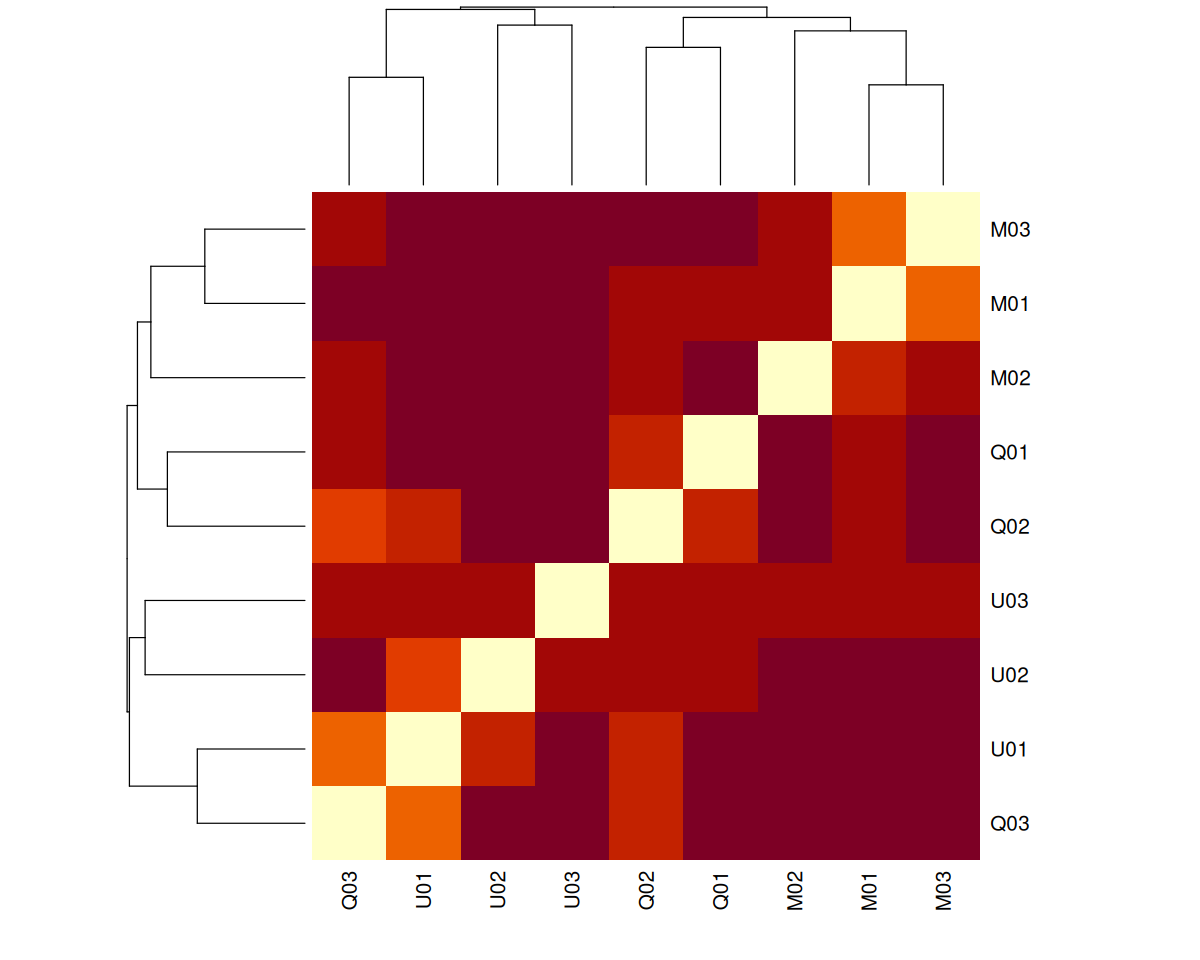

In [8]:
spe_mat <- spe %>%
  column_to_rownames("site")

#normalize abundance
spe_norm <- decostand(spe_mat, method = "normalize")

#Chord distance matrix
spe_dist <- vegdist(spe_norm, method = "euclidean")
spe_dist

#Heatmap distance matrix
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe_dist))

In [13]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe2.norm <- decostand(spe2, "normalize") # normalize datas
spe2.ch <- vegdist(spe2.norm, "euc") # calculate the chord distance matrix (euclidean distance of normalized species data)

### Single linkage

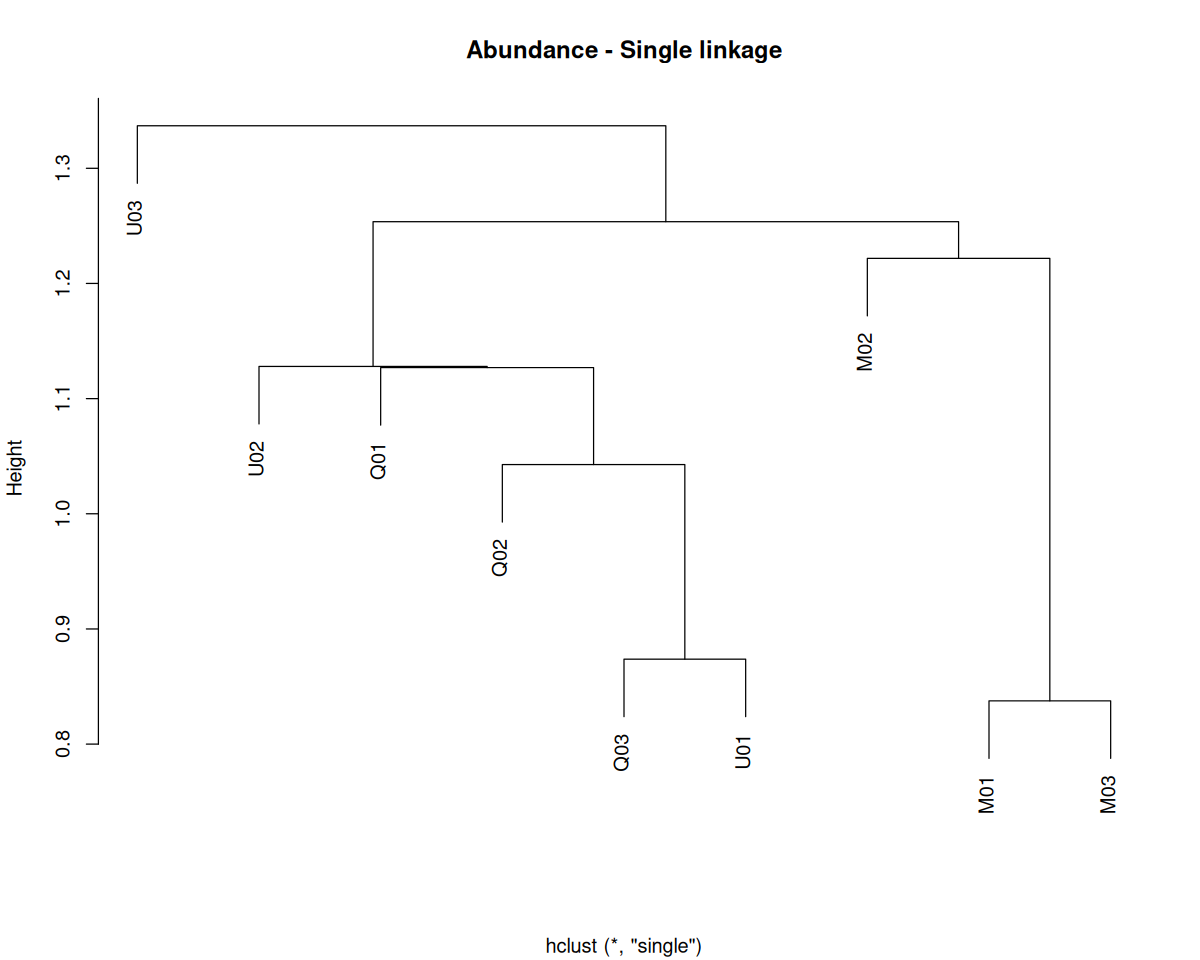

In [28]:
#Hierarchical clustering
spe.single <- hclust(spe_dist, method = "single")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe.single, main = "Abundance - Single linkage", xlab = "")

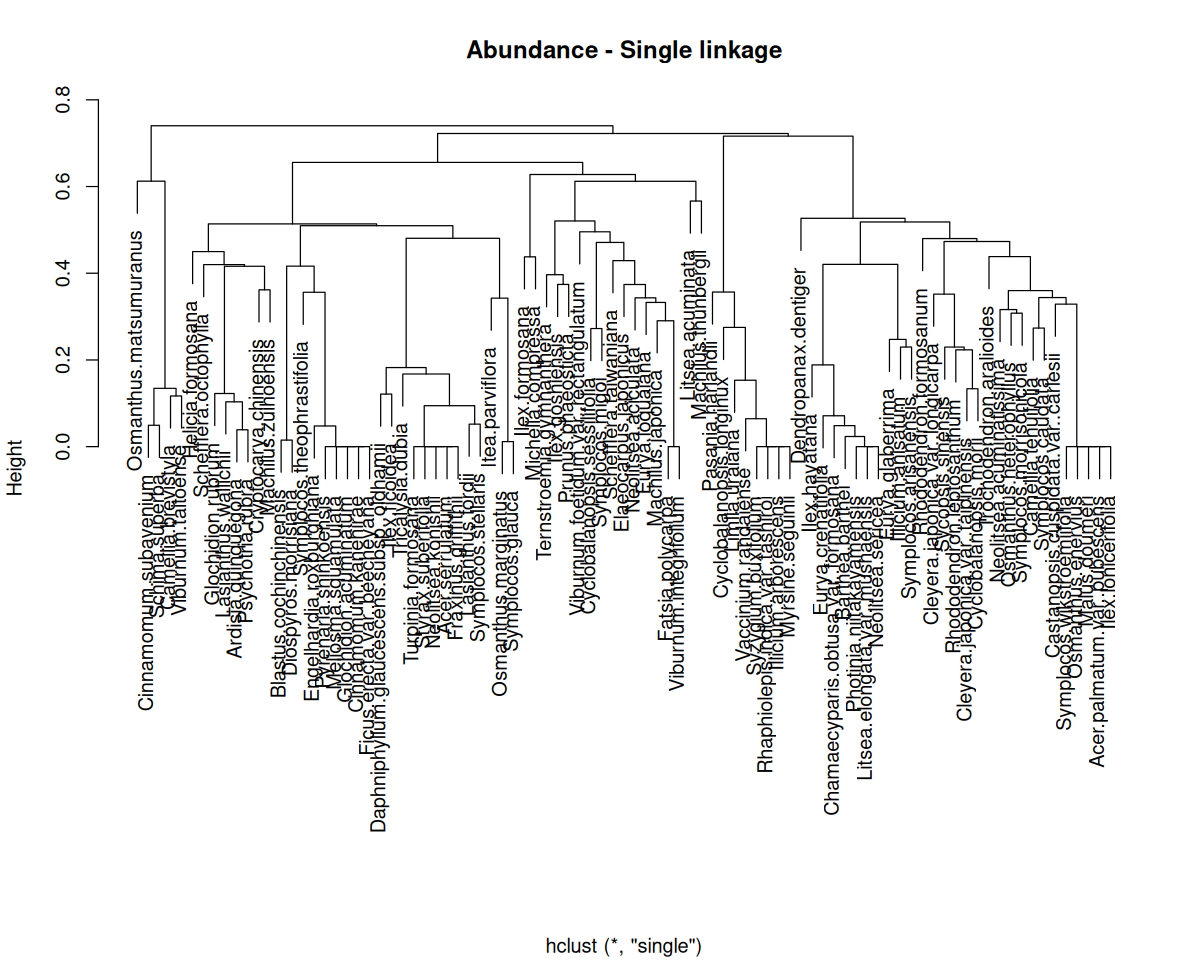

In [14]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.single <- hclust(spe2.ch, method = "single")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.single,  main = "Abundance - Single linkage", xlab="")

In [15]:
#cophenetic distance
spe.ch.single.coph <- cophenetic(spe.ch.single)
cor(spe2.ch, spe.ch.single.coph)

[1] 0.8021756

In [25]:
#cophenetic distance
spe.single.coph <- cophenetic(spe.single)
cor(spe_dist, spe.single.coph)

[1] 0.8264814

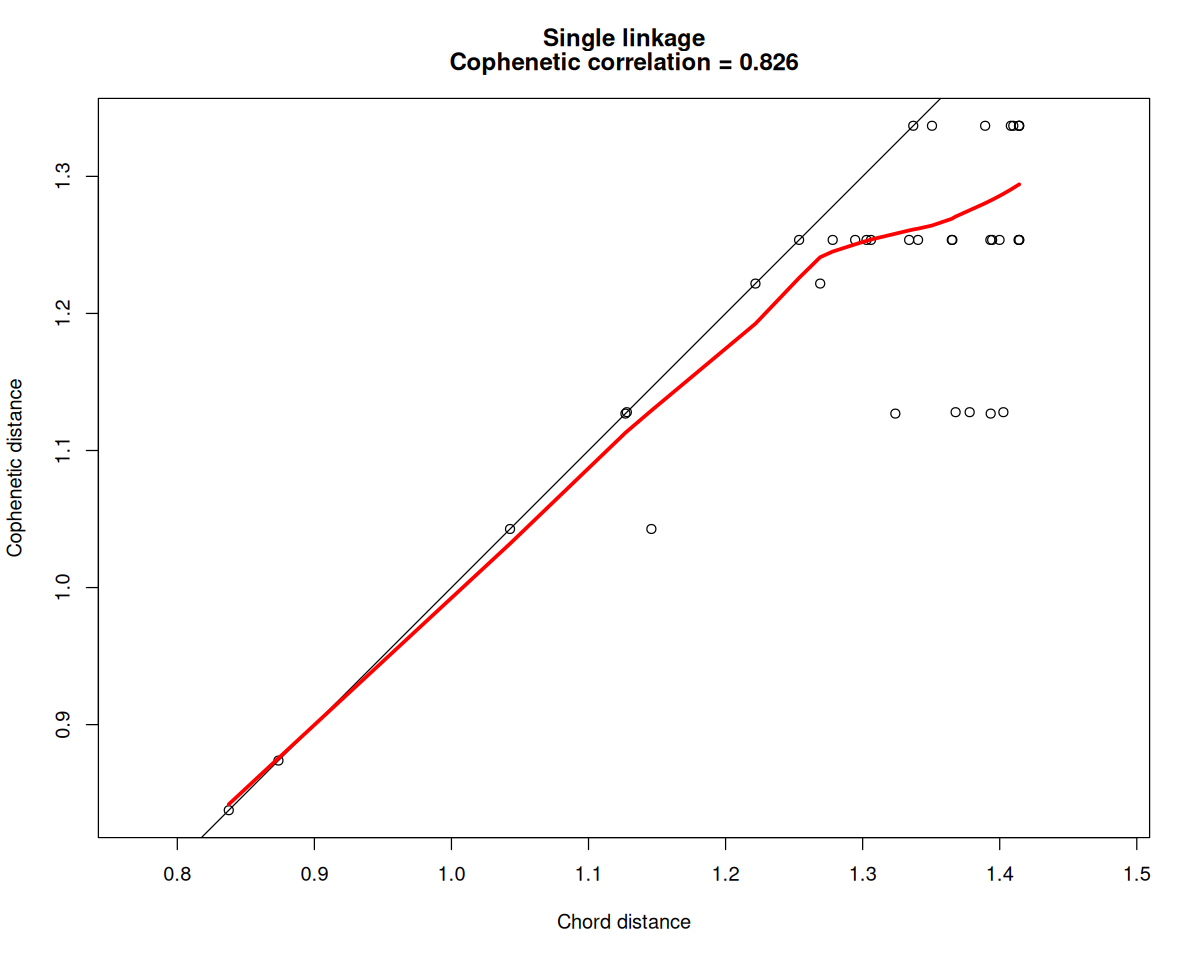

In [26]:
#Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.single.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Single linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.single.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.single.coph), col = "red", lwd = 3)

### Complete linkage

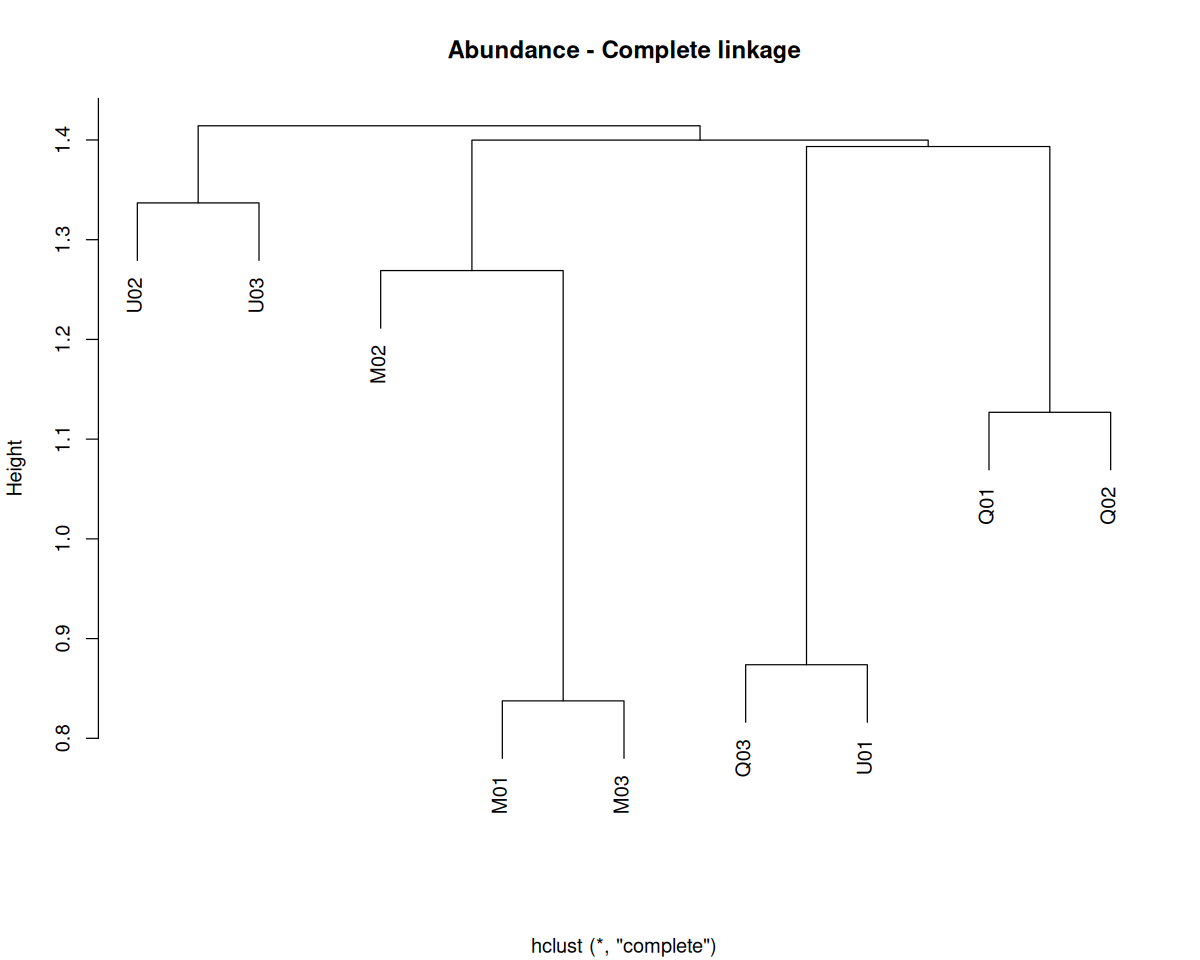

In [12]:
#Hierarchical clustering
spe.complete <- hclust(spe_dist, method = "complete")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe.complete, main = "Abundance - Complete linkage", xlab = "")

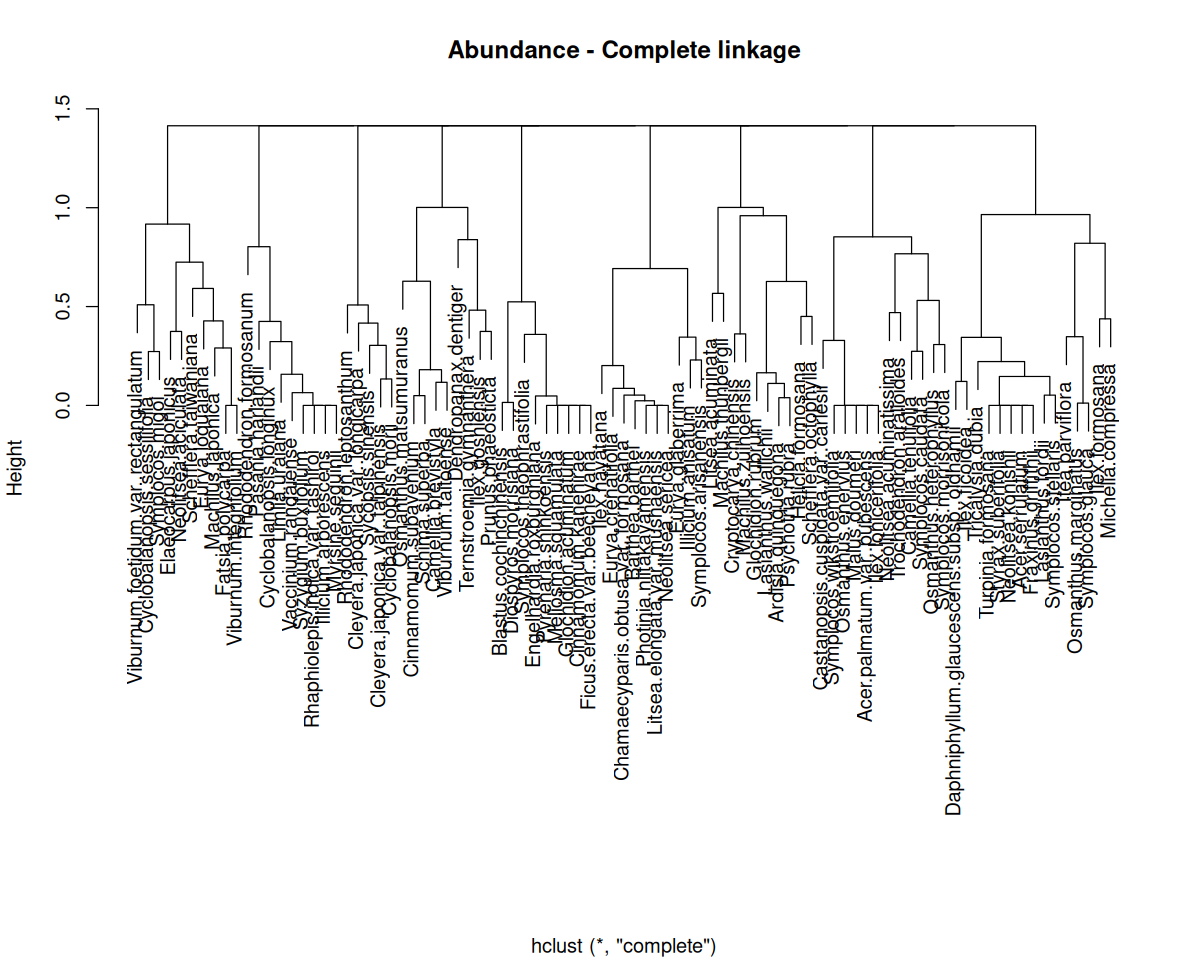

In [16]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.complete <- hclust(spe2.ch, method = "complete")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.complete,  main = "Abundance - Complete linkage", xlab="")

In [13]:
#Cophenetic distance
spe.comp.coph <- cophenetic(spe.complete)
cor(spe_dist, spe.comp.coph)

[1] 0.8209811

In [17]:
#cophenetic distance
spe.ch.complete.coph <- cophenetic(spe.ch.complete)
cor(spe2.ch, spe.ch.complete.coph)

[1] 0.8632932

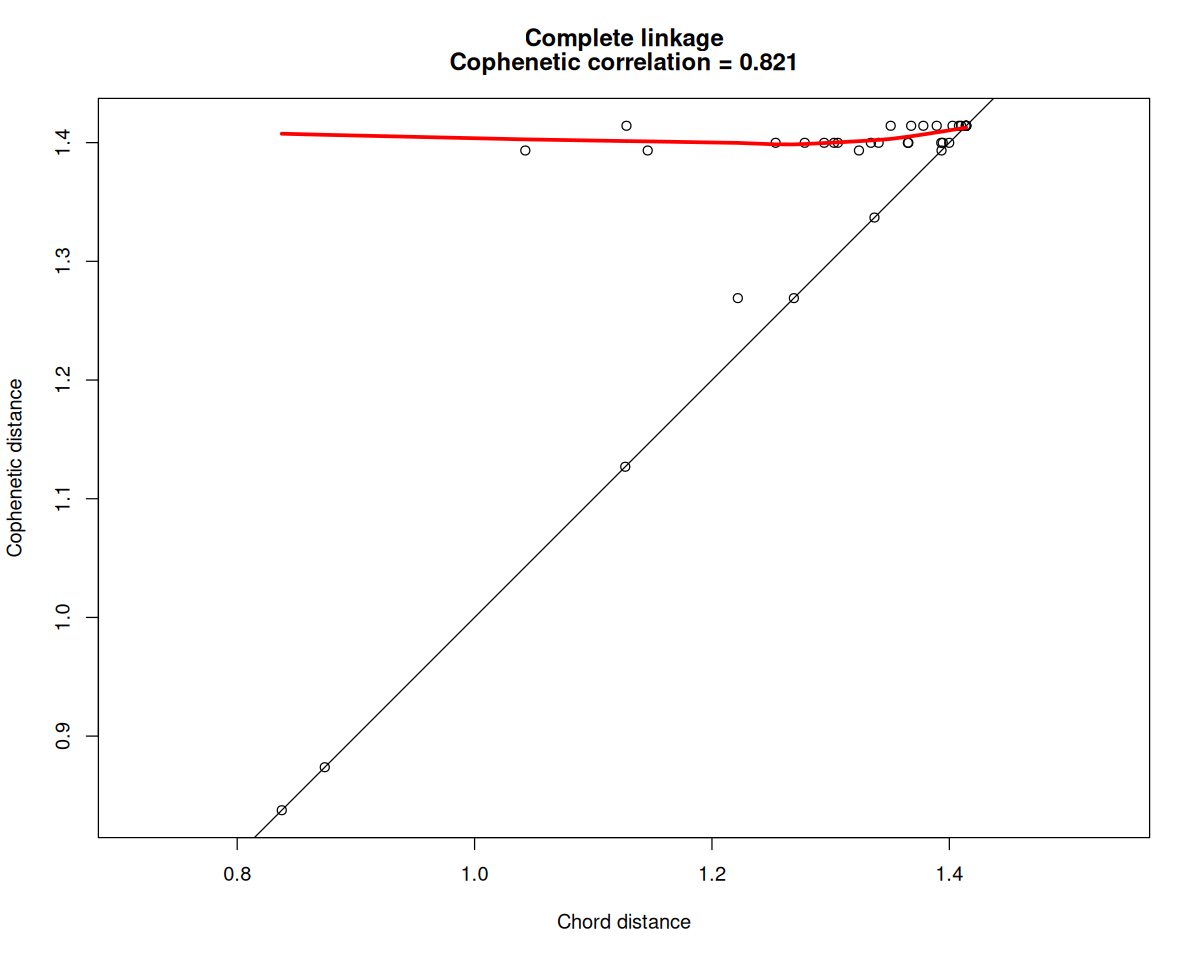

In [14]:
#Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.comp.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Complete linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.comp.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.comp.coph), col = "red", lwd = 3)


### Centroid

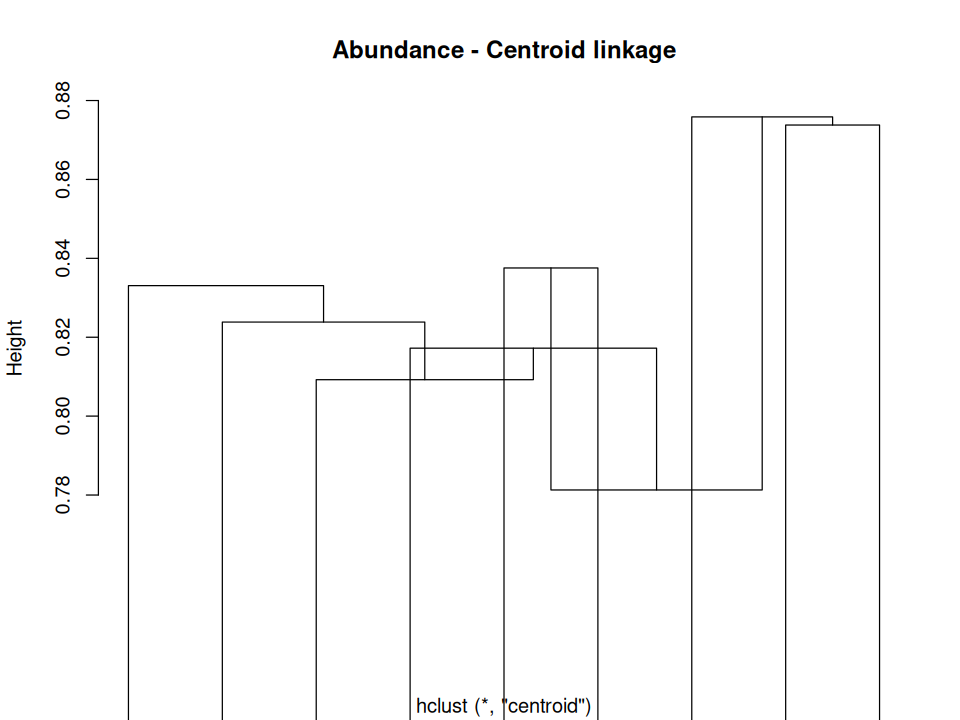

In [20]:
#Hierarchical clustering
spe.centroid <- hclust(spe_dist, method = "centroid")
options(repr.plot.width = 8, repr.plot.height =6)
plot(spe.centroid, main = "Abundance - Centroid linkage", xlab = "")

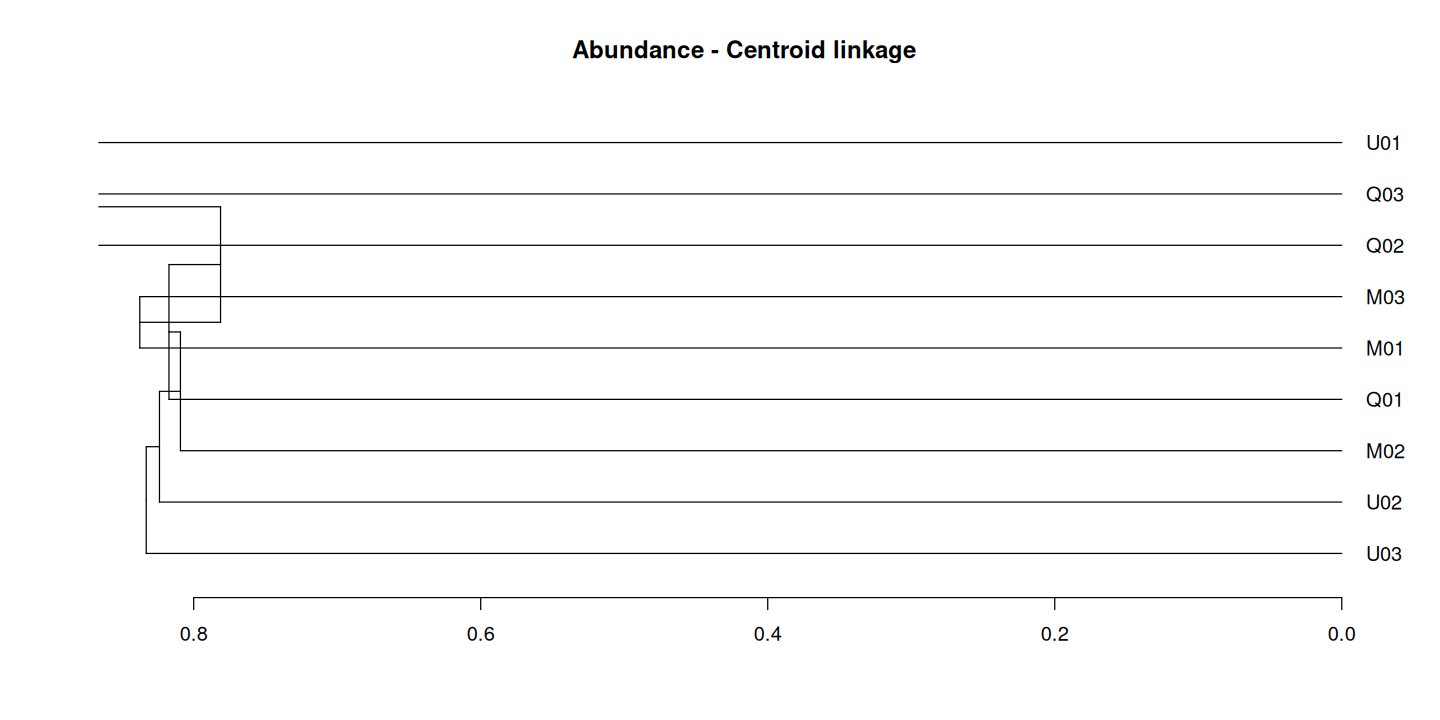

In [39]:
plot(as.dendrogram(spe.centroid), main = "Abundance - Centroid linkage", horiz = TRUE)


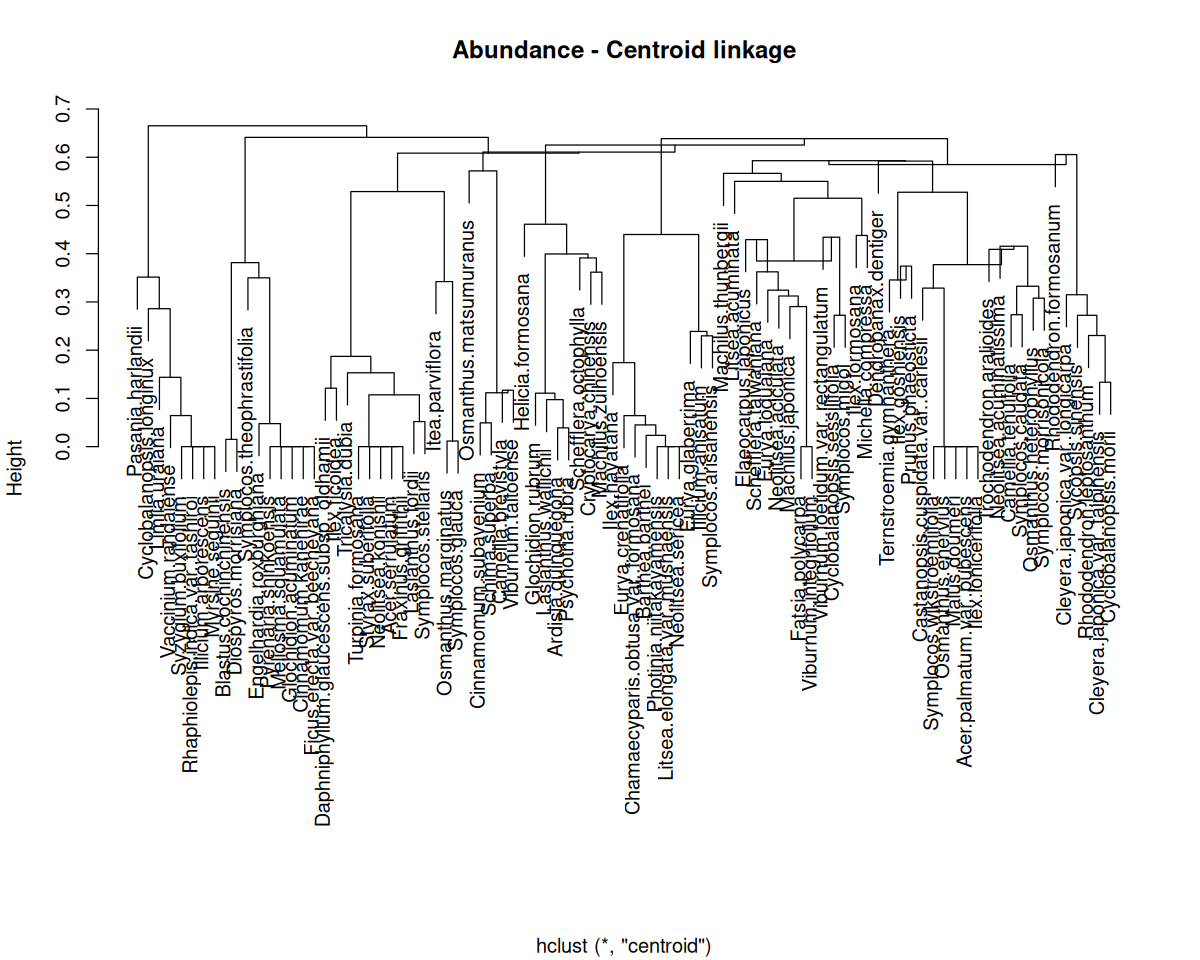

In [18]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.centroid <- hclust(spe2.ch, method = "centroid")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.centroid,  main = "Abundance - Centroid linkage", xlab="")

In [19]:
#cophenetic distance
spe.ch.centroid.coph <- cophenetic(spe.ch.centroid)
cor(spe2.ch, spe.ch.centroid.coph)

[1] 0.8323007

In [21]:
#Cophenetic distance
spe.centroid.coph <- cophenetic(spe.centroid)
cor(spe_dist, spe.centroid.coph)

[1] -0.4141534

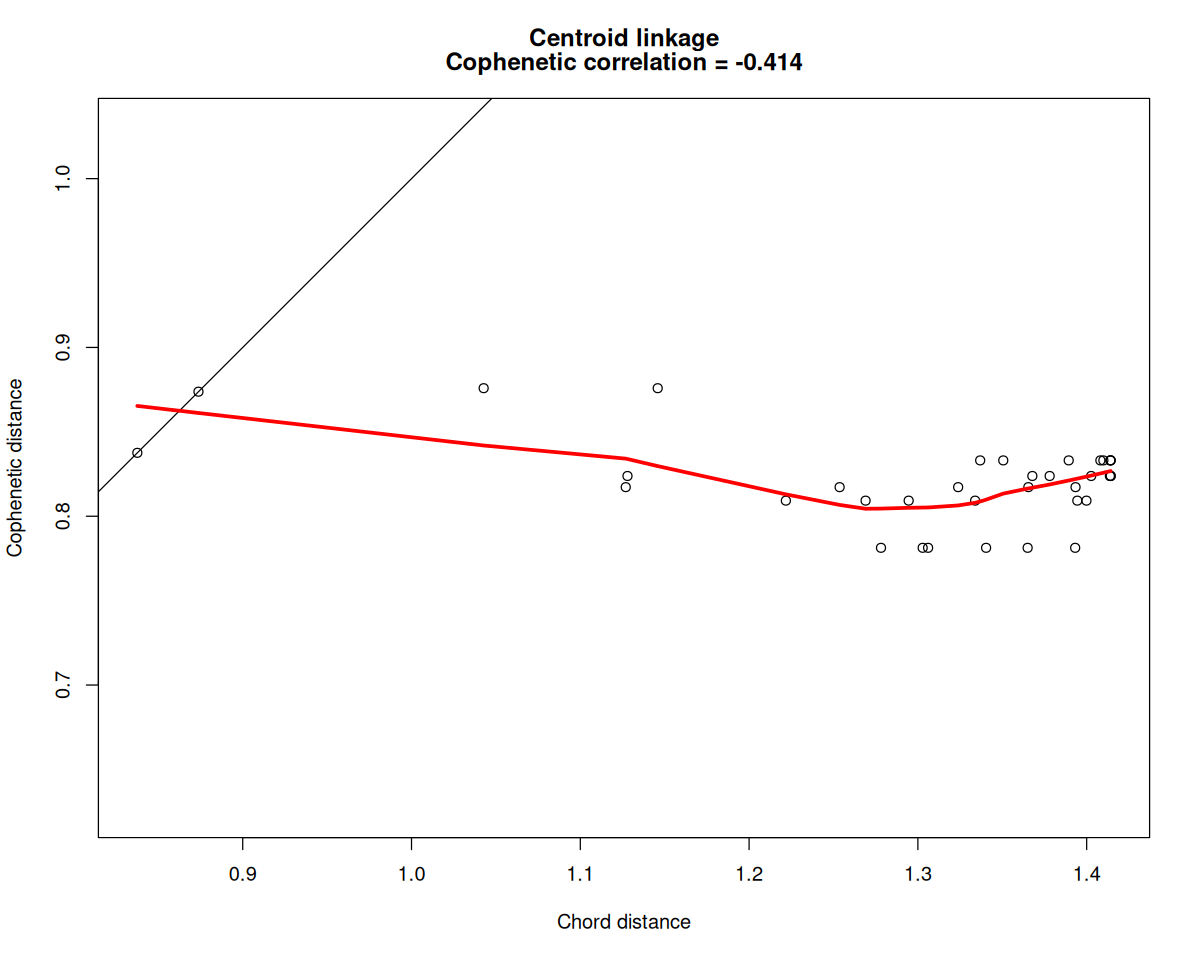

In [22]:
# Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.centroid.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Centroid linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.centroid.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.centroid.coph), col = "red", lwd = 3)

# PcoA

### Average cluster

In [7]:
spe_mat <- spe %>%
  column_to_rownames("site")

#normalize abundance
spe_norm <- decostand(spe_mat, method = "normalize")

#Chord distance matrix
spe.ch <- vegdist(spe_norm, method = "euclidean")
spe.ch

          M01       M02       M03       Q01       Q02       Q03       U01
M02 1.2217848                                                            
M03 0.8375617 1.2690128                                                  
Q01 1.2536300 1.3944600 1.3654448                                        
Q02 1.2781406 1.3339139 1.3404112 1.1269296                              
Q03 1.3028390 1.2945328 1.3060528 1.3238517 1.0427409                    
U01 1.3650200 1.3998677 1.3931773 1.3934027 1.1458584 0.8737859          
U02 1.4142136 1.4137391 1.4142136 1.3780734 1.3678148 1.4026732 1.1279569
U03 1.4142136 1.4140476 1.4141070 1.4081217 1.3893560 1.4098913 1.3505826
          U02
M02          
M03          
Q01          
Q02          
Q03          
U01          
U02          
U03 1.3369047

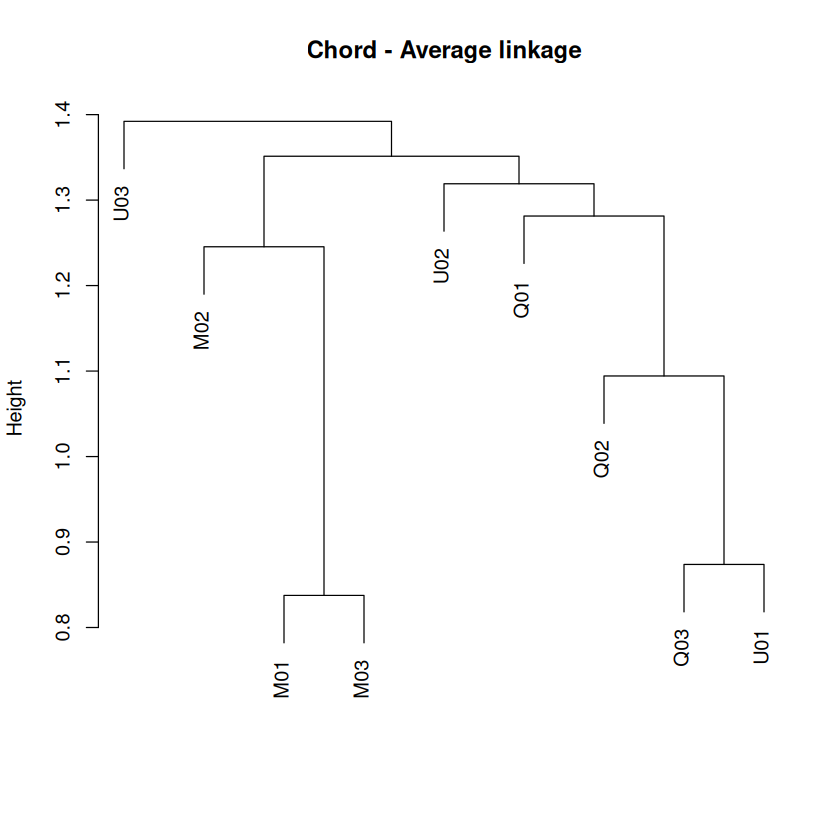

In [8]:
# Hierarchical clustering
spe.avg <- hclust(spe.ch, method = "average")
plot(spe.avg, main = "Chord - Average linkage", xlab = "", sub = "")

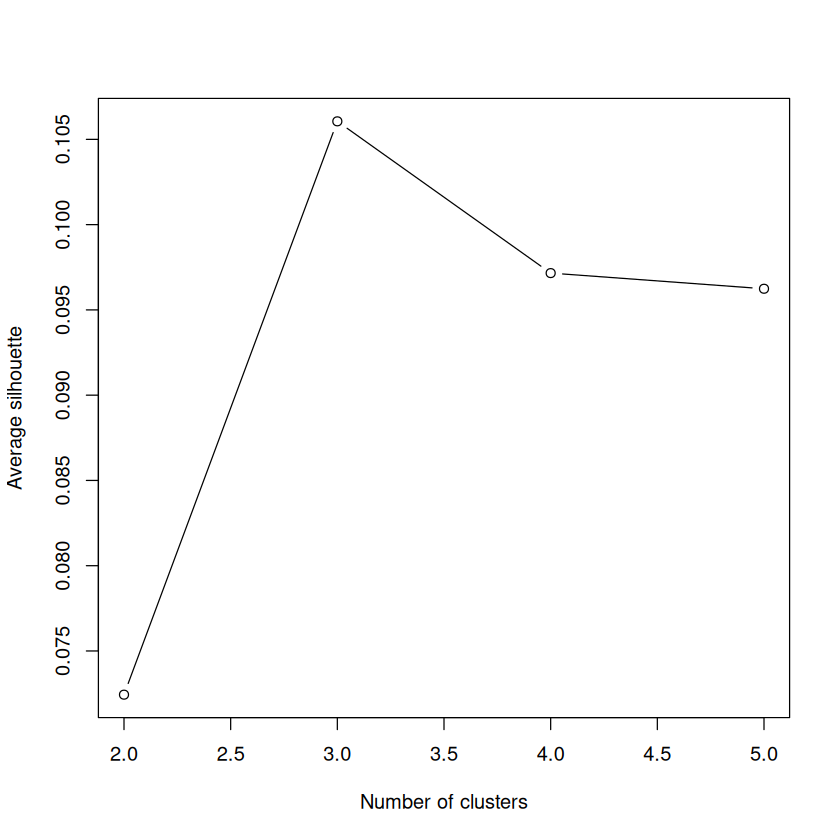

In [20]:
sil_width <- c()
for(k in 2:5){
  clust <- cutree(spe.avg, k=k)
  sil <- silhouette(clust, spe.ch)
  sil_width[k] <- mean(sil[,3])
}
plot(2:5, sil_width[2:5], type="b", xlab="Number of clusters", ylab="Average silhouette")


In [19]:
k_opt <- 3  
clusters <- cutree(spe.avg, k=k_opt)

site_clusters <- data.frame(
  site = rownames(spe_norm),
  cluster = factor(clusters)
)

### PcoA

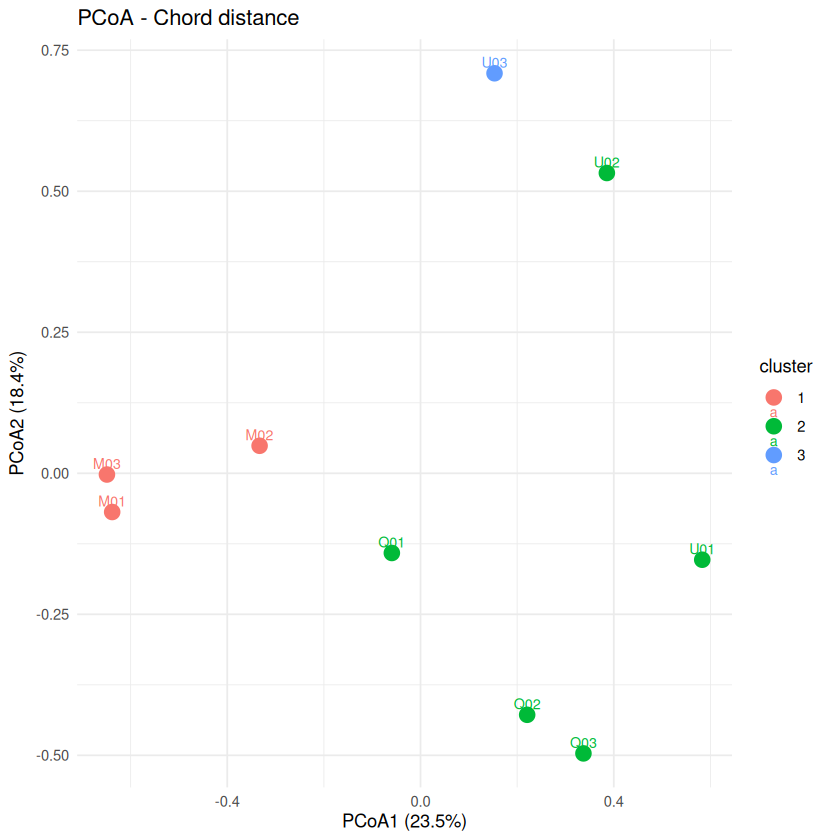

In [12]:
# PCoA (only point)
pcoa <- cmdscale(spe.ch, eig = TRUE, k = 2)

# Variance 
eig <- pcoa$eig
var_expl <- eig / sum(eig)

# Data frame for plotting
pcoa_sites <- data.frame(
  site = rownames(pcoa$points),
  PC1 = pcoa$points[,1],
  PC2 = pcoa$points[,2],
  cluster = factor(clusters)
)

# Scatter plot 
ggplot(pcoa_sites, aes(x=PC1, y=PC2, color=cluster, label=site)) +
  geom_point(size=4) +
  geom_text(vjust=-0.5, size=3) +
  xlab(paste0("PCoA1 (", round(var_expl[1]*100,1), "%)")) +
  ylab(paste0("PCoA2 (", round(var_expl[2]*100,1), "%)")) +
  ggtitle("PCoA - Chord distance") +
  theme_minimal()


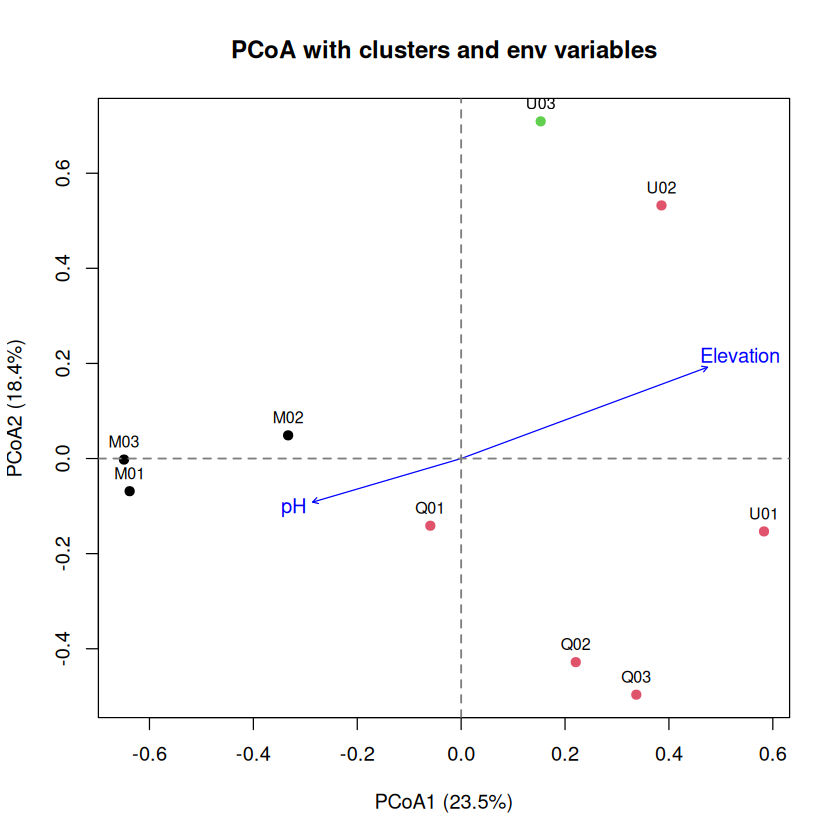

In [17]:
# Env
env_data <- env %>% column_to_rownames("site")

# Envfit
ef <- envfit(pcoa, env_data[, c("Elevation","pH")], permutations = 999)

# Plot PCoA with arrows
plot(pcoa_sites$PC1, pcoa_sites$PC2,
     col = pcoa_sites$cluster, pch=19,
     xlab = paste0("PCoA1 (", round(var_expl[1]*100,1), "%)"),
     ylab = paste0("PCoA2 (", round(var_expl[2]*100,1), "%)"),
     main = "PCoA with clusters and env variables")


text(pcoa_sites$PC1, pcoa_sites$PC2, labels=pcoa_sites$site, pos=3, cex=0.8)
plot(ef, add=TRUE, col="blue")
abline(h=0, v=0, col="gray50", lty=2, lwd=1.5)  # lignes pointillées grises



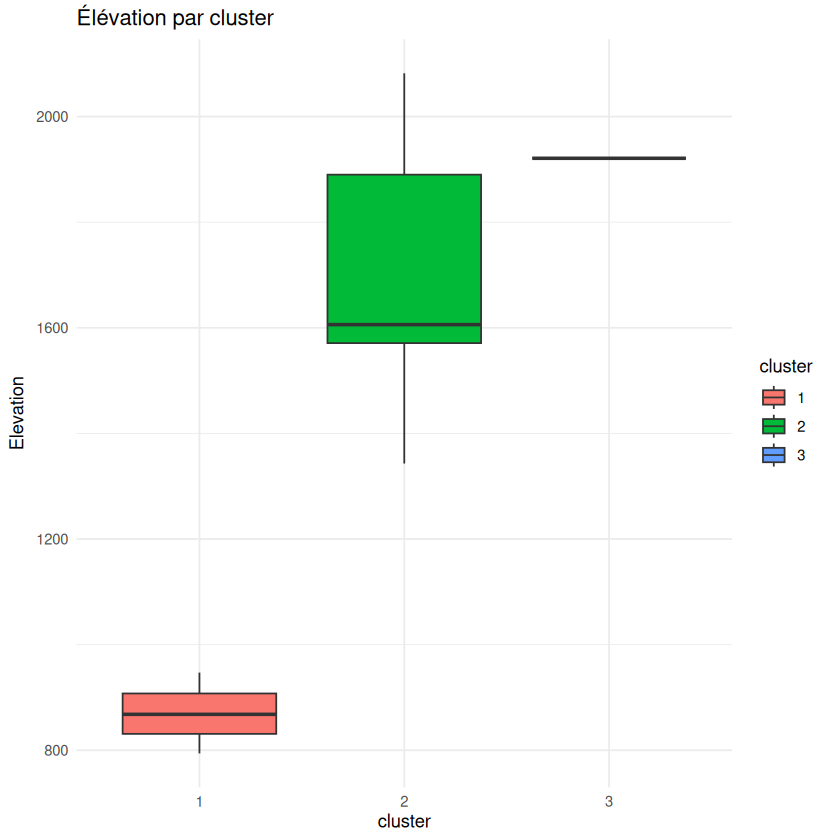

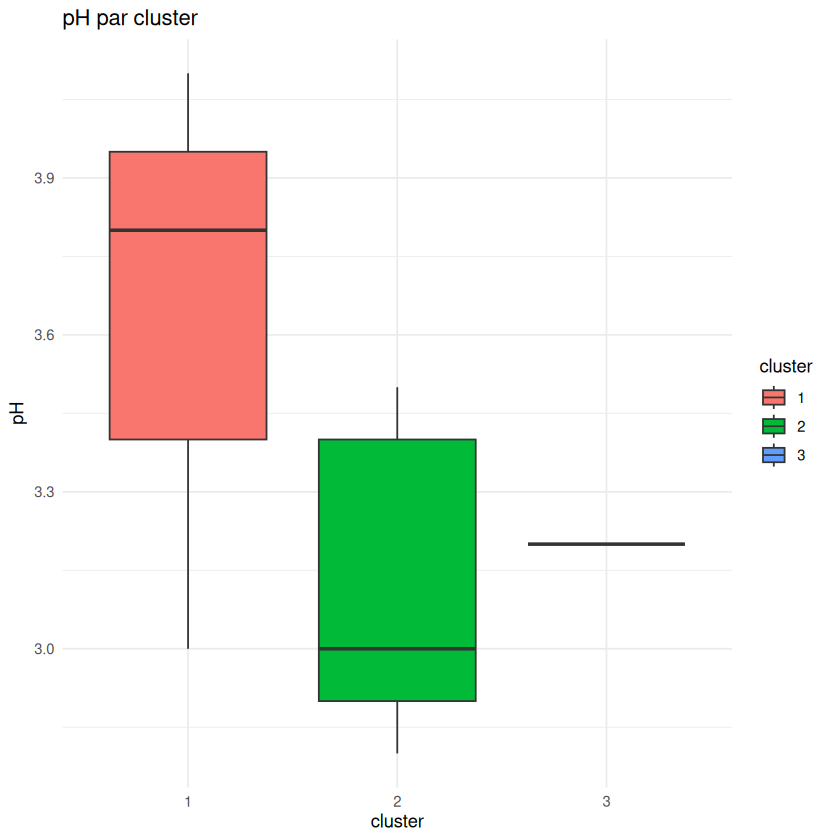

In [15]:
# Fusionn clusters et env
env_clusters <- merge(site_clusters, env, by="site")

# Boxplot for elevation
ggplot(env_clusters, aes(x=cluster, y=Elevation, fill=cluster)) +
  geom_boxplot() +
  ggtitle("Élévation par cluster") +
  theme_minimal()

# Boxplot for pH
ggplot(env_clusters, aes(x=cluster, y=pH, fill=cluster)) +
  geom_boxplot() +
  ggtitle("pH par cluster") +
  theme_minimal()
